# Layer Normalization - Time Series Data

## Giới thiệu

Layer Normalization cho dữ liệu time series với shape (batch, time_steps, features).

Layer Normalization sẽ normalize theo:
- Mean và variance được tính trên time và feature dimensions
- Normalize cho từng sample độc lập (không phụ thuộc vào batch)

## Công thức

```
mean = mean(x, dim=(1, 2))  # Tính mean theo time và feature dims
var = var(x, dim=(1, 2))    # Tính variance theo time và feature dims
x_norm = (x - mean) / sqrt(var + eps)
output = gamma * x_norm + beta
```

Trong đó:
- gamma: learnable scale parameter
- beta: learnable shift parameter
- eps: small constant để tránh chia cho 0

Khác với BatchNorm: LayerNorm tính statistics cho từng sample riêng biệt.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LayerNorm1D_TS:
    """
    Layer Normalization cho time series data (3D tensor: batch, time_steps, features)
    """
    def __init__(self, eps=1e-5):
        self.eps = eps
        self.gamma = 1.0
        self.beta = 0.0
        
    def forward(self, x):
        """
        x shape: (batch, time_steps, features)
        """
        mean = np.mean(x, axis=(1, 2), keepdims=True)
        var = np.var(x, axis=(1, 2), keepdims=True)
        x_norm = (x - mean) / np.sqrt(var + self.eps)
        output = self.gamma * x_norm + self.beta
        return output

print("LayerNorm1D_TS class đã được định nghĩa!")


LayerNorm1D_TS class đã được định nghĩa!


## Ví dụ 1: 1 Sample, 1 Feature

Shape: (1, 10, 1) - 1 batch, 10 time steps, 1 feature


Input shape: (1, 10, 1)
Input mean: 0.8961, std: 3.7148

Output mean: 0.0000, std: 1.0000


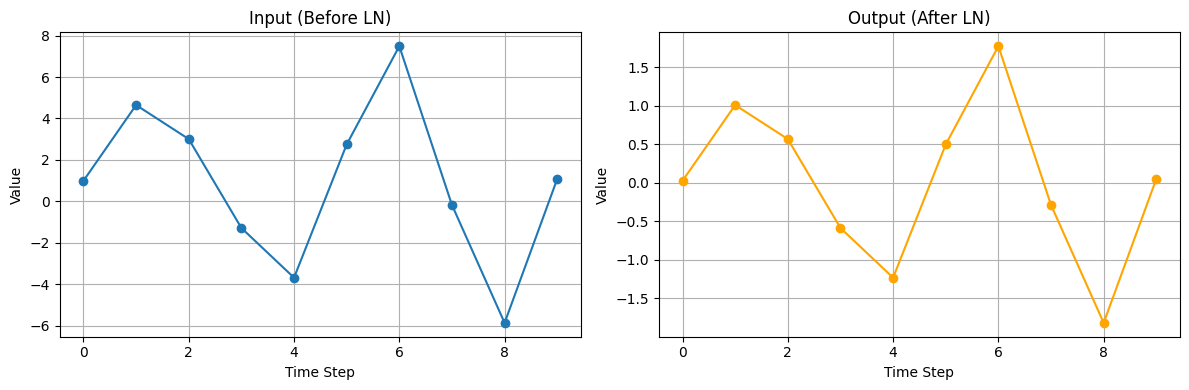

In [2]:
# Ví dụ 1: 1 Sample, 1 Feature
np.random.seed(42)
t = np.linspace(0, 4*np.pi, 10)
x1 = np.sin(t).reshape(1, 10, 1) * 5 + np.random.randn(1, 10, 1) * 2
print(f"Input shape: {x1.shape}")
print(f"Input mean: {np.mean(x1):.4f}, std: {np.std(x1):.4f}")

ln1 = LayerNorm1D_TS()
output1 = ln1.forward(x1)
print(f"\nOutput mean: {np.mean(output1):.4f}, std: {np.std(output1):.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(x1[0, :, 0], marker='o')
axes[0].set_title('Input (Before LN)')
axes[0].set_xlabel('Time Step')
axes[0].set_ylabel('Value')
axes[0].grid(True)
axes[1].plot(output1[0, :, 0], marker='o', color='orange')
axes[1].set_title('Output (After LN)')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Value')
axes[1].grid(True)
plt.tight_layout()
plt.show()


## Ví dụ 2: 1 Sample, 2 Features

Shape: (1, 10, 2) - 1 batch, 10 time steps, 2 features


Input shape: (1, 10, 2)
Sample mean: 0.0051, std: 3.1210

Sample output mean: -0.0000, std: 1.0000


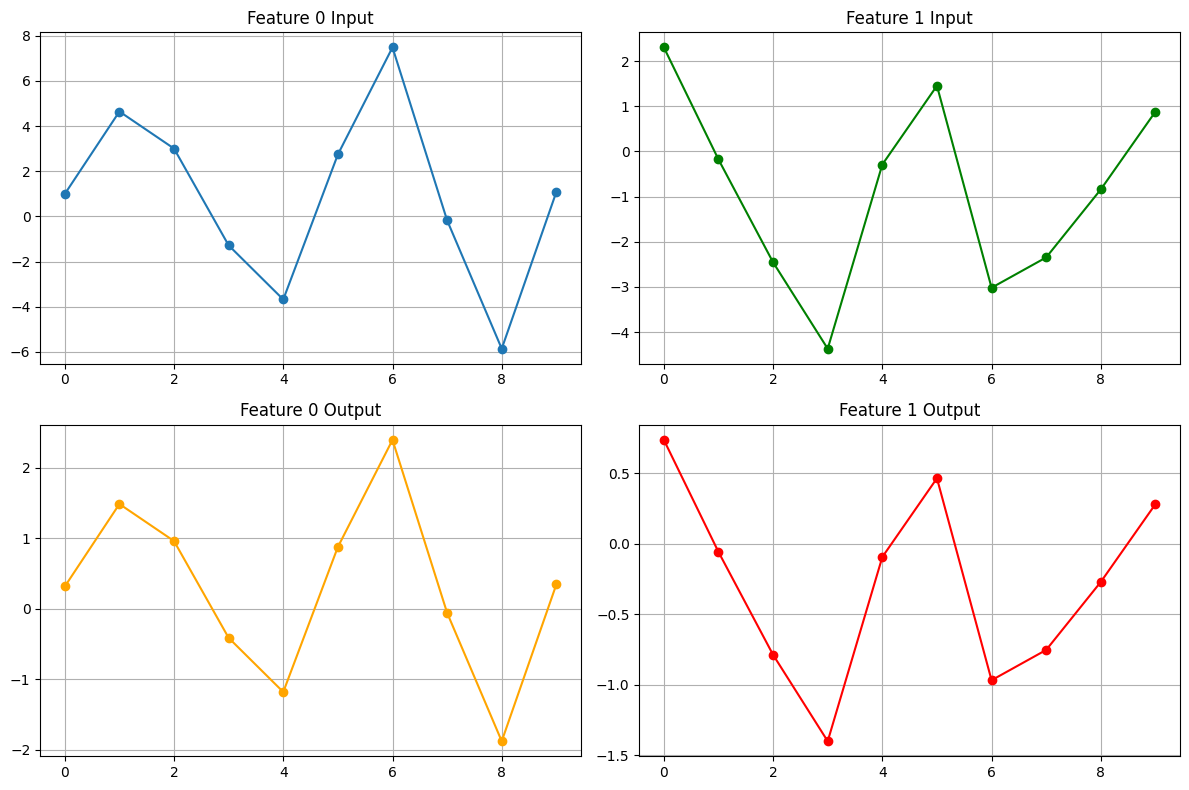

In [3]:
# Ví dụ 2: 1 Sample, 2 Features
np.random.seed(42)
t = np.linspace(0, 4*np.pi, 10)
x2 = np.zeros((1, 10, 2))
x2[0, :, 0] = np.sin(t) * 5 + np.random.randn(10) * 2
x2[0, :, 1] = np.cos(t) * 3 + np.random.randn(10) * 1.5
print(f"Input shape: {x2.shape}")
print(f"Sample mean: {np.mean(x2[0]):.4f}, std: {np.std(x2[0]):.4f}")

ln2 = LayerNorm1D_TS()
output2 = ln2.forward(x2)
print(f"\nSample output mean: {np.mean(output2[0]):.4f}, std: {np.std(output2[0]):.4f}")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(x2[0, :, 0], marker='o')
axes[0, 0].set_title('Feature 0 Input')
axes[0, 0].grid(True)
axes[0, 1].plot(x2[0, :, 1], marker='o', color='green')
axes[0, 1].set_title('Feature 1 Input')
axes[0, 1].grid(True)
axes[1, 0].plot(output2[0, :, 0], marker='o', color='orange')
axes[1, 0].set_title('Feature 0 Output')
axes[1, 0].grid(True)
axes[1, 1].plot(output2[0, :, 1], marker='o', color='red')
axes[1, 1].set_title('Feature 1 Output')
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()


 là 

Input shape: (2, 10, 1)
Sample 0 mean: 0.8961, std: 3.7148
Sample 1 mean: -0.8860, std: 2.0232

Sample 0 output mean: 0.0000, std: 1.0000
Sample 1 output mean: 0.0000, std: 1.0000


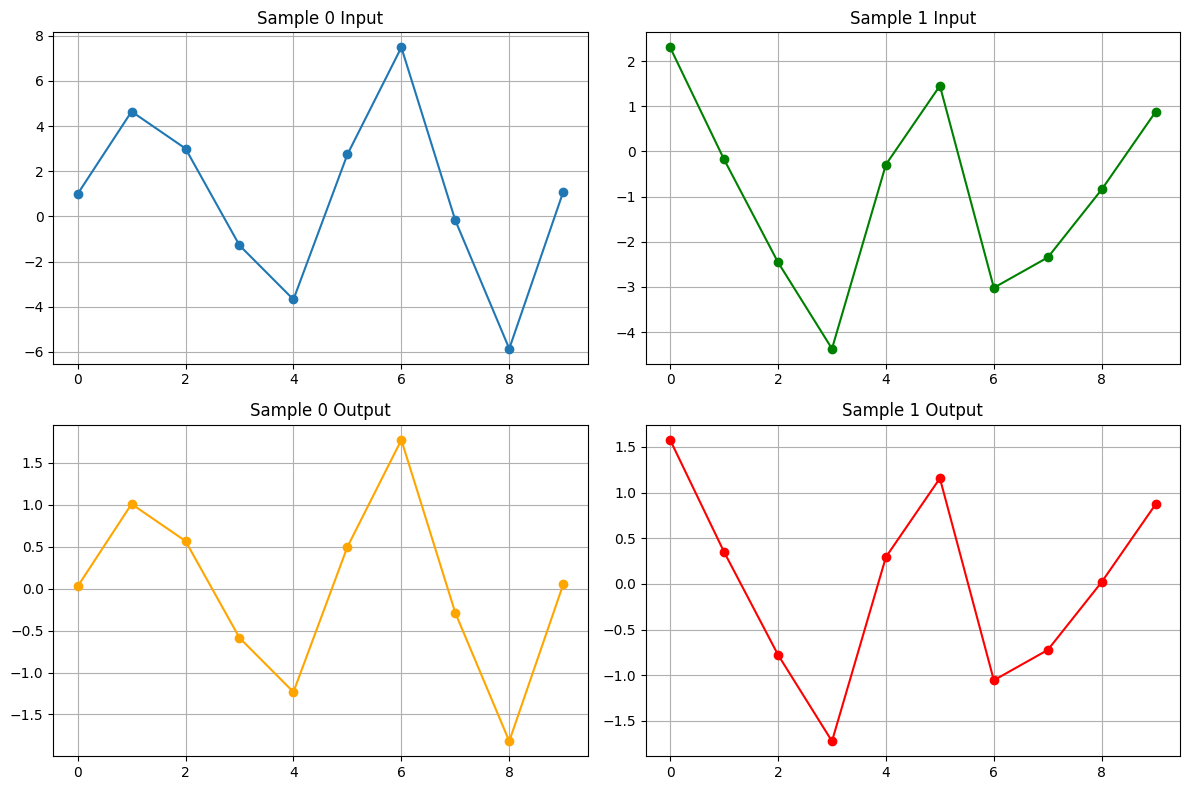

In [4]:
# Ví dụ 3: 2 Samples, 1 Feature
np.random.seed(42)
t = np.linspace(0, 4*np.pi, 10)
x3 = np.zeros((2, 10, 1))
x3[0, :, 0] = np.sin(t) * 5 + np.random.randn(10) * 2
x3[1, :, 0] = np.cos(t) * 3 + np.random.randn(10) * 1.5
print(f"Input shape: {x3.shape}")
print(f"Sample 0 mean: {np.mean(x3[0]):.4f}, std: {np.std(x3[0]):.4f}")
print(f"Sample 1 mean: {np.mean(x3[1]):.4f}, std: {np.std(x3[1]):.4f}")

ln3 = LayerNorm1D_TS()
output3 = ln3.forward(x3)
print(f"\nSample 0 output mean: {np.mean(output3[0]):.4f}, std: {np.std(output3[0]):.4f}")
print(f"Sample 1 output mean: {np.mean(output3[1]):.4f}, std: {np.std(output3[1]):.4f}")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(x3[0, :, 0], marker='o')
axes[0, 0].set_title('Sample 0 Input')
axes[0, 0].grid(True)
axes[0, 1].plot(x3[1, :, 0], marker='o', color='green')
axes[0, 1].set_title('Sample 1 Input')
axes[0, 1].grid(True)
axes[1, 0].plot(output3[0, :, 0], marker='o', color='orange')
axes[1, 0].set_title('Sample 0 Output')
axes[1, 0].grid(True)
axes[1, 1].plot(output3[1, :, 0], marker='o', color='red')
axes[1, 1].set_title('Sample 1 Output')
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()


## Ví dụ 4: 2 Samples, 2 Features

Shape: (2, 10, 2) - 2 batches, 10 time steps, 2 features
V

Input shape: (2, 10, 2)
Sample 0 - Input mean: 0.0051, std: 3.1210
Sample 0 - Output mean: -0.0000, std: 1.0000
Sample 1 - Input mean: -0.2857, std: 2.5728
Sample 1 - Output mean: -0.0000, std: 1.0000


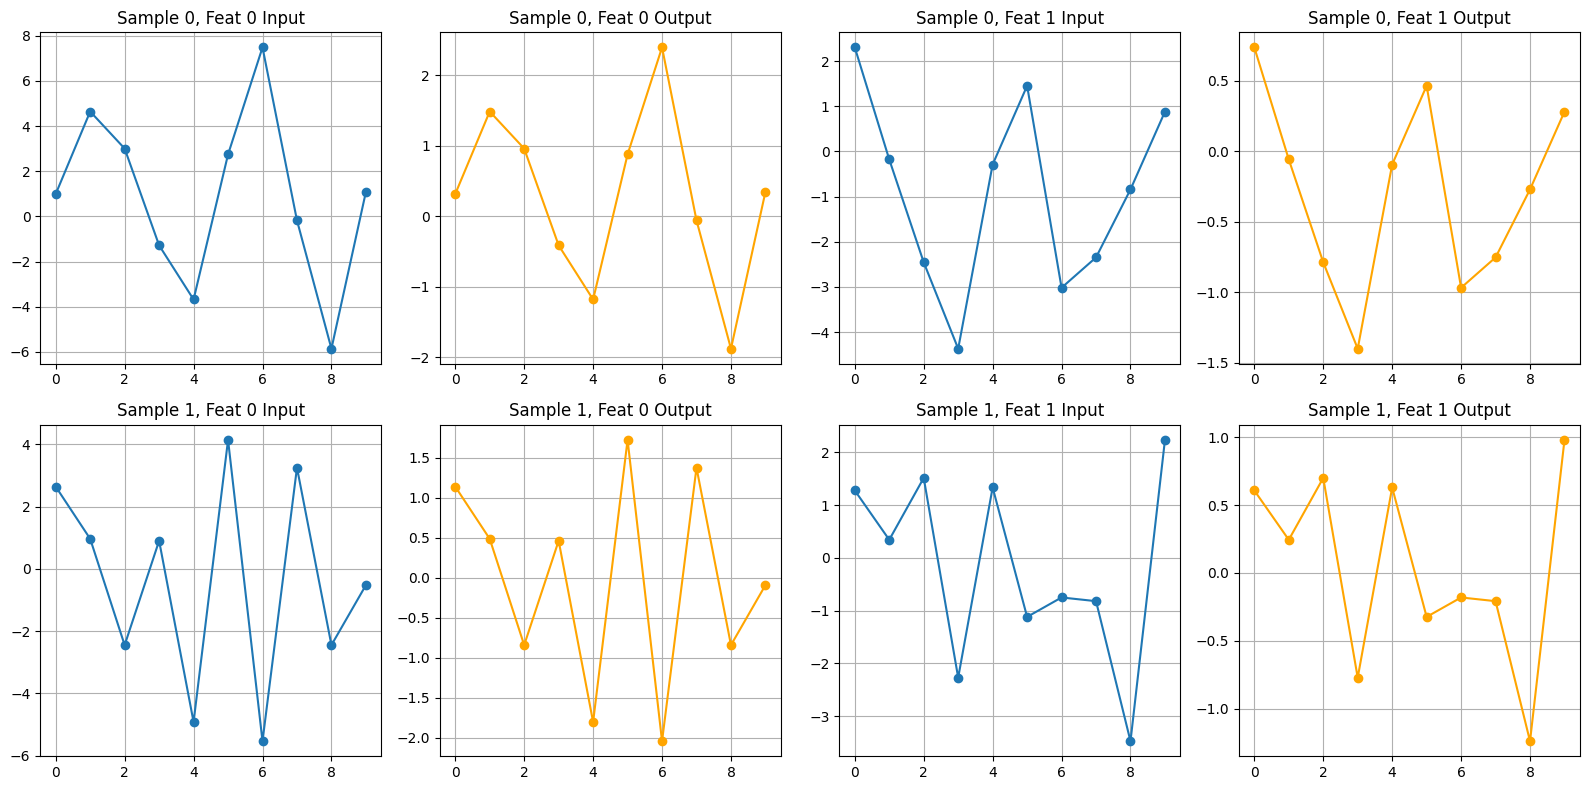

In [5]:
# Ví dụ 4: 2 Samples, 2 Features
np.random.seed(42)
t = np.linspace(0, 4*np.pi, 10)
x4 = np.zeros((2, 10, 2))
x4[0, :, 0] = np.sin(t) * 5 + np.random.randn(10) * 2
x4[0, :, 1] = np.cos(t) * 3 + np.random.randn(10) * 1.5
x4[1, :, 0] = np.sin(2*t) * 4 + np.random.randn(10) * 1.8
x4[1, :, 1] = np.cos(2*t) * 2 + np.random.randn(10) * 1.2
print(f"Input shape: {x4.shape}")

ln4 = LayerNorm1D_TS()
output4 = ln4.forward(x4)

for b in range(2):
    print(f"Sample {b} - Input mean: {np.mean(x4[b]):.4f}, std: {np.std(x4[b]):.4f}")
    print(f"Sample {b} - Output mean: {np.mean(output4[b]):.4f}, std: {np.std(output4[b]):.4f}")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for b in range(2):
    for f in range(2):
        axes[b, f*2].plot(x4[b, :, f], marker='o')
        axes[b, f*2].set_title(f'Sample {b}, Feat {f} Input')
        axes[b, f*2].grid(True)
        axes[b, f*2+1].plot(output4[b, :, f], marker='o', color='orange')
        axes[b, f*2+1].set_title(f'Sample {b}, Feat {f} Output')
        axes[b, f*2+1].grid(True)
plt.tight_layout()
plt.show()


## Ví dụ 5: Shape phức tạp - (batch_size, time, V*len(lag)+number_of_time)

Ví dụ với:
- batch_size = 2
- time = 10
- V = 2 (số biến)
- len(lag) = 3 (lag window)
- number_of_time = 2 (features thời gian bổ sung)
- Total features = V*len(lag) + number_of_time = 2*3 + 2 = 8

Shape: (2, 10, 8)


Tham số:
  batch_size = 2
  time = 10
  V = 2 (số biến)
  len(lag) = 3 (lag window)
  number_of_time = 2
  Total features = V*len(lag) + number_of_time = 2*3 + 2 = 8

Input shape: (2, 10, 8)

Output shape: (2, 10, 8)

Sample 0 - Feature 0 (V0, lag0): Input mean=0.5008, Output mean=-0.0584
Sample 0 - Feature 3 (V1, lag0): Input mean=-0.4059, Output mean=-0.2844
Sample 0 - Feature 6 (time feature 0): Input mean=0.4522, Output mean=-0.0705


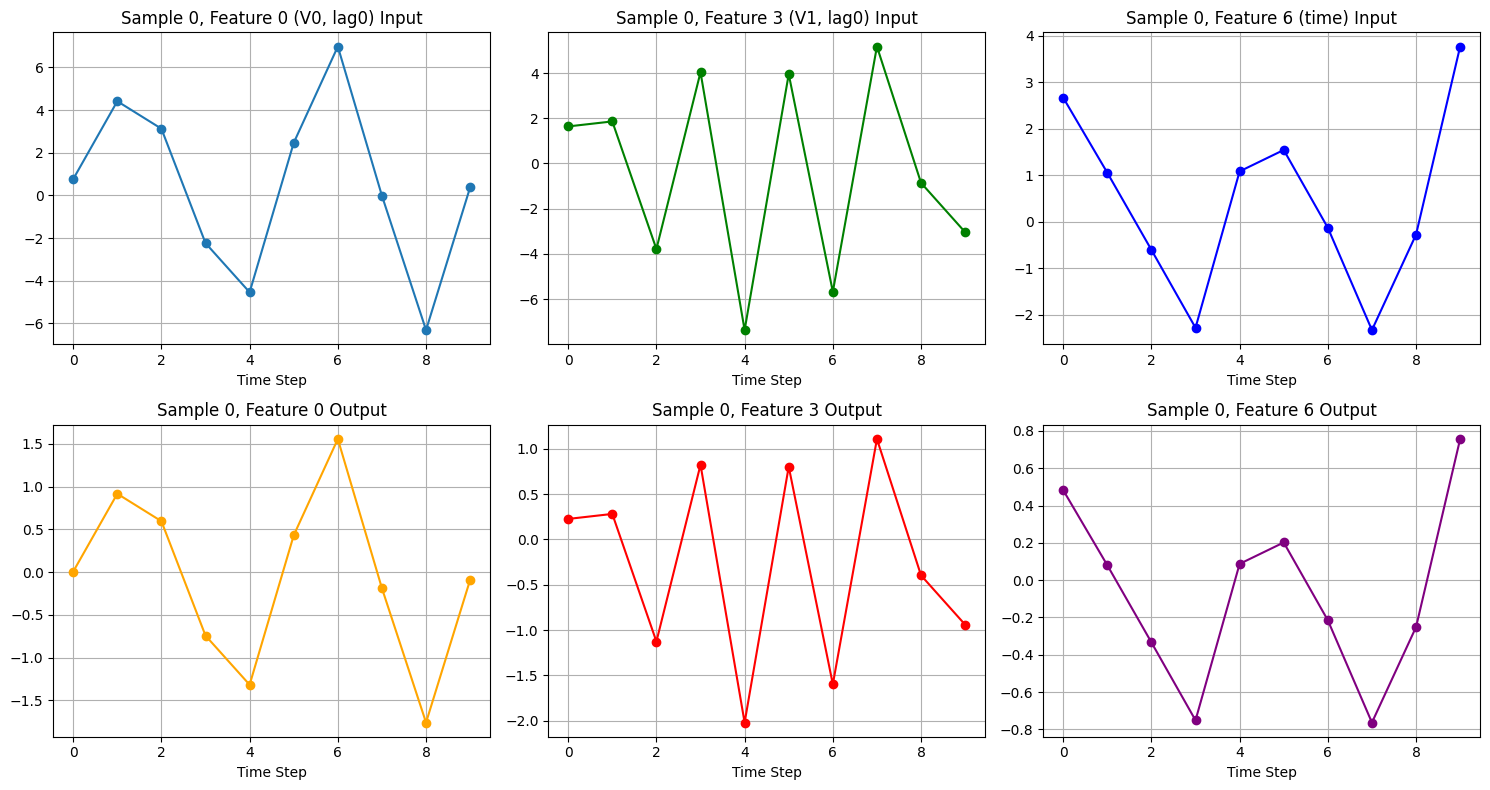

In [6]:
# Ví dụ 5: Shape phức tạp (batch_size, time, V*len(lag)+number_of_time)
np.random.seed(42)

# Tham số
batch_size = 2
time = 10
V = 2  # số biến
len_lag = 3  # độ dài lag window
number_of_time = 2  # features thời gian bổ sung
num_features = V * len_lag + number_of_time  # 2*3 + 2 = 8

print(f"Tham số:")
print(f"  batch_size = {batch_size}")
print(f"  time = {time}")
print(f"  V = {V} (số biến)")
print(f"  len(lag) = {len_lag} (lag window)")
print(f"  number_of_time = {number_of_time}")
print(f"  Total features = V*len(lag) + number_of_time = {V}*{len_lag} + {number_of_time} = {num_features}")

# Tạo dữ liệu mô phỏng
t = np.linspace(0, 4*np.pi, time)
x5 = np.zeros((batch_size, time, num_features))

for b in range(batch_size):
    # Features từ lag windows (V*len_lag features)
    for v in range(V):
        base_signal = np.sin((v+1)*t) * (5 + b*2) + np.random.randn(time) * 2
        for lag in range(len_lag):
            feature_idx = v * len_lag + lag
            x5[b, :, feature_idx] = np.roll(base_signal, lag) + np.random.randn(time) * 0.5
    
    # Features thời gian bổ sung (number_of_time features)
    x5[b, :, V*len_lag] = np.cos(t) * 3 + np.random.randn(time) * 1.5
    x5[b, :, V*len_lag+1] = t / np.max(t) * 10 + np.random.randn(time) * 1

print(f"\nInput shape: {x5.shape}")

# Khởi tạo LayerNorm
ln5 = LayerNorm1D_TS()
output5 = ln5.forward(x5)

print(f"\nOutput shape: {output5.shape}")

# Hiển thị statistics cho một vài features
print(f"\nSample 0 - Feature 0 (V0, lag0): Input mean={np.mean(x5[0, :, 0]):.4f}, Output mean={np.mean(output5[0, :, 0]):.4f}")
print(f"Sample 0 - Feature 3 (V1, lag0): Input mean={np.mean(x5[0, :, 3]):.4f}, Output mean={np.mean(output5[0, :, 3]):.4f}")
print(f"Sample 0 - Feature 6 (time feature 0): Input mean={np.mean(x5[0, :, 6]):.4f}, Output mean={np.mean(output5[0, :, 6]):.4f}")

# Visualize một vài features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes[0, 0].plot(x5[0, :, 0], marker='o')
axes[0, 0].set_title('Sample 0, Feature 0 (V0, lag0) Input')
axes[0, 0].set_xlabel('Time Step')
axes[0, 0].grid(True)
axes[0, 1].plot(x5[0, :, 3], marker='o', color='green')
axes[0, 1].set_title('Sample 0, Feature 3 (V1, lag0) Input')
axes[0, 1].set_xlabel('Time Step')
axes[0, 1].grid(True)
axes[0, 2].plot(x5[0, :, 6], marker='o', color='blue')
axes[0, 2].set_title('Sample 0, Feature 6 (time) Input')
axes[0, 2].set_xlabel('Time Step')
axes[0, 2].grid(True)

axes[1, 0].plot(output5[0, :, 0], marker='o', color='orange')
axes[1, 0].set_title('Sample 0, Feature 0 Output')
axes[1, 0].set_xlabel('Time Step')
axes[1, 0].grid(True)
axes[1, 1].plot(output5[0, :, 3], marker='o', color='red')
axes[1, 1].set_title('Sample 0, Feature 3 Output')
axes[1, 1].set_xlabel('Time Step')
axes[1, 1].grid(True)
axes[1, 2].plot(output5[0, :, 6], marker='o', color='purple')
axes[1, 2].set_title('Sample 0, Feature 6 Output')
axes[1, 2].set_xlabel('Time Step')
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()
